1. Подготовка среды

In [1]:
# Импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотеки для машинного обучения
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Для глубокой нейронной сети
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Игнорируем предупреждения
import warnings
warnings.filterwarnings('ignore')


2. Загрузка и ознакомление с данными

Загрузка и ознакомление с данными

In [2]:
# Загрузка данных
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Первые несколько строк обучающего набора
print("Обучающий набор:")
display(train.head())

print("\nТестовый набор:")
display(test.head())

Обучающий набор:


,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0



Тестовый набор:


,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3


In [3]:
# Информация о данных
print("\nИнформация об обучающем наборе:")
train.info()


Информация об обучающем наборе:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                            

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    400000 non-null  int64  
 1   age                                   400000 non-null  float64
 2   sex                                   400000 non-null  int64  
 3   chest                                 400000 non-null  float64
 4   resting_blood_pressure                400000 non-null  float64
 5   serum_cholestoral                     400000 non-null  float64
 6   fasting_blood_sugar                   400000 non-null  int64  
 7   resting_electrocardiographic_results  400000 non-null  int64  
 8   maximum_heart_rate_achieved           400000 non-null  float64
 9   exercise_induced_angina               400000 non-null  int64  
 10  oldpeak                               400000 non-null  float64
 11  

In [5]:
print("\nСтатистическое описание:")
train.describe()



Статистическое описание:


,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,299999.500000,54.426085,0.677447,3.170247,131.340485,249.592420,0.150757,1.020148,149.592069,0.333502,1.051391,1.596033,0.681303,4.711378,0.444185
std,173205.225094,9.086041,0.467454,0.949618,17.842450,51.699976,0.357812,0.994204,23.072593,0.471464,1.144288,0.629821,0.950669,1.934766,0.496875
min,0.000000,26.061695,0.000000,-0.538498,82.918527,98.326263,0.000000,0.000000,61.844168,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,149999.750000,48.078493,0.000000,3.000000,119.924094,216.475964,0.000000,0.000000,135.704237,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,299999.500000,55.133425,1.000000,3.000000,129.727941,244.233699,0.000000,2.000000,153.224828,0.000000,0.811101,2.000000,0.000000,3.000000,0.000000
75%,449999.250000,60.663775,1.000000,4.000000,139.915216,274.345453,0.000000,2.000000,165.165497,1.000000,1.674081,2.000000,1.000000,7.000000,1.000000
max,599999.000000,79.591647,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.803372,3.000000,3.000000,7.000000,1.000000


3. Предобработка данных

3.1 Объединение данных для удобства обработки

Мы объединяем обучающий и тестовый наборы для единой предобработки.

In [6]:
# Сохранение ID из тестового набора для инференса
test_ids = test['ID']

# Добавляем столбец 'is_train' для разделения после предобработки
train['is_train'] = 1
test['is_train'] = 0

# Добавляем целевую переменную в тестовом наборе как NaN
test['class'] = np.nan

# Объединяем данные
data = pd.concat([train, test], sort=False).reset_index(drop=True)
print(f"Объединённый набор данных: {data.shape}")


Объединённый набор данных: (1000000, 16)


3.2 Обработка недействительных значений
Проверим наличие пропущенных значений и аномалий.

In [7]:
# Проверка пропущенных значений
print("Пропущенные значения в объединённом наборе данных:")
print(data.isnull().sum())

# Заполнение пропущенных значений, если необходимо
# Пример: заполнение медианой для числовых признаков
numerical_features = ['age', 'resting_blood_pressure', 'serum_cholestoral',
                      'maximum_heart_rate_achieved', 'oldpeak', 'number_of_major_vessels']

for feature in numerical_features:
    if data[feature].isnull().sum() > 0:
        median = data[feature].median()
        data[feature].fillna(median, inplace=True)
        print(f"Заполнены пропущенные значения в '{feature}' медианой: {median}")

# Проверка снова на пропущенные значения
print("\nПропущенные значения после заполнения:")
print(data.isnull().sum())


Пропущенные значения в объединённом наборе данных:
ID                                           0
age                                          0
sex                                          0
chest                                        0
resting_blood_pressure                       0
serum_cholestoral                            0
fasting_blood_sugar                          0
resting_electrocardiographic_results         0
maximum_heart_rate_achieved                  0
exercise_induced_angina                      0
oldpeak                                      0
slope                                        0
number_of_major_vessels                      0
thal                                         0
class                                   400000
is_train                                     0
dtype: int64

Пропущенные значения после заполнения:
ID                                           0
age                                          0
sex                                          0
che

3.3 Преобразование категориальных переменных

Фильтрация недействительных значений.

Применение One-Hot Encoding только для sex.

In [8]:
# Определение категориальных признаков
categorical_features = ['sex']  # Добавьте другие категориальные признаки, если они есть

# Преобразование переменной 'sex' с использованием One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_sex = encoder.fit_transform(data[categorical_features])

# Создание DataFrame из закодированной переменной 'sex'
encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(categorical_features))

# Сброс индексов для корректного объединения
encoded_sex_df.reset_index(drop=True, inplace=True)

# Объединение закодированной переменной с исходными данными
data = pd.concat([data.reset_index(drop=True), encoded_sex_df], axis=1)

# Удаляем исходные категориальные переменные
data.drop(categorical_features, axis=1, inplace=True)

print(f"\nФорма данных после One-Hot Encoding для 'sex': {data.shape}")
display(data.head())



Форма данных после One-Hot Encoding для 'sex': (1000000, 16)


,ID,age,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class,is_train,sex_1
0,0,49.207124,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1.0,1,0.0
1,1,53.628425,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0.0,1,1.0
2,2,49.591426,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1.0,1,1.0
3,3,58.991445,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1.0,1,1.0
4,4,51.053602,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0.0,1,1.0


3.4 Масштабирование числовых признаков

In [9]:
# Инициализация масштабатора
scaler = StandardScaler()

# Масштабирование числовых признаков
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("\nФорма данных после масштабирования числовых признаков:")
display(data.head())



Форма данных после масштабирования числовых признаков:


,ID,age,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class,is_train,sex_1
0,0,-0.573171,4.000000,1.772737,-1.324437,0,0,-0.060296,1,-0.093023,2,-0.716816,3,1.0,1,0.0
1,1,-0.086888,1.741596,-0.062655,0.519875,0,2,0.142968,0,-0.815245,2,-0.716816,3,0.0,1,1.0
2,2,-0.530903,4.000000,0.876557,-0.508475,1,2,-2.048849,1,0.495096,2,1.387274,7,1.0,1,1.0
3,3,0.502970,4.000000,-1.063452,-1.205755,0,0,0.370434,1,-0.919422,1,0.335229,7,1.0,1,1.0
4,4,-0.370084,1.954609,0.374216,-0.214859,0,0,0.993586,0,0.087137,1,0.335229,3,0.0,1,1.0


4. Анализ данных

4.1 Корреляционный анализ

Создадим тепловую карту корреляций и диаграммы рассеяния для наиболее коррелированных признаков с целевой переменной.

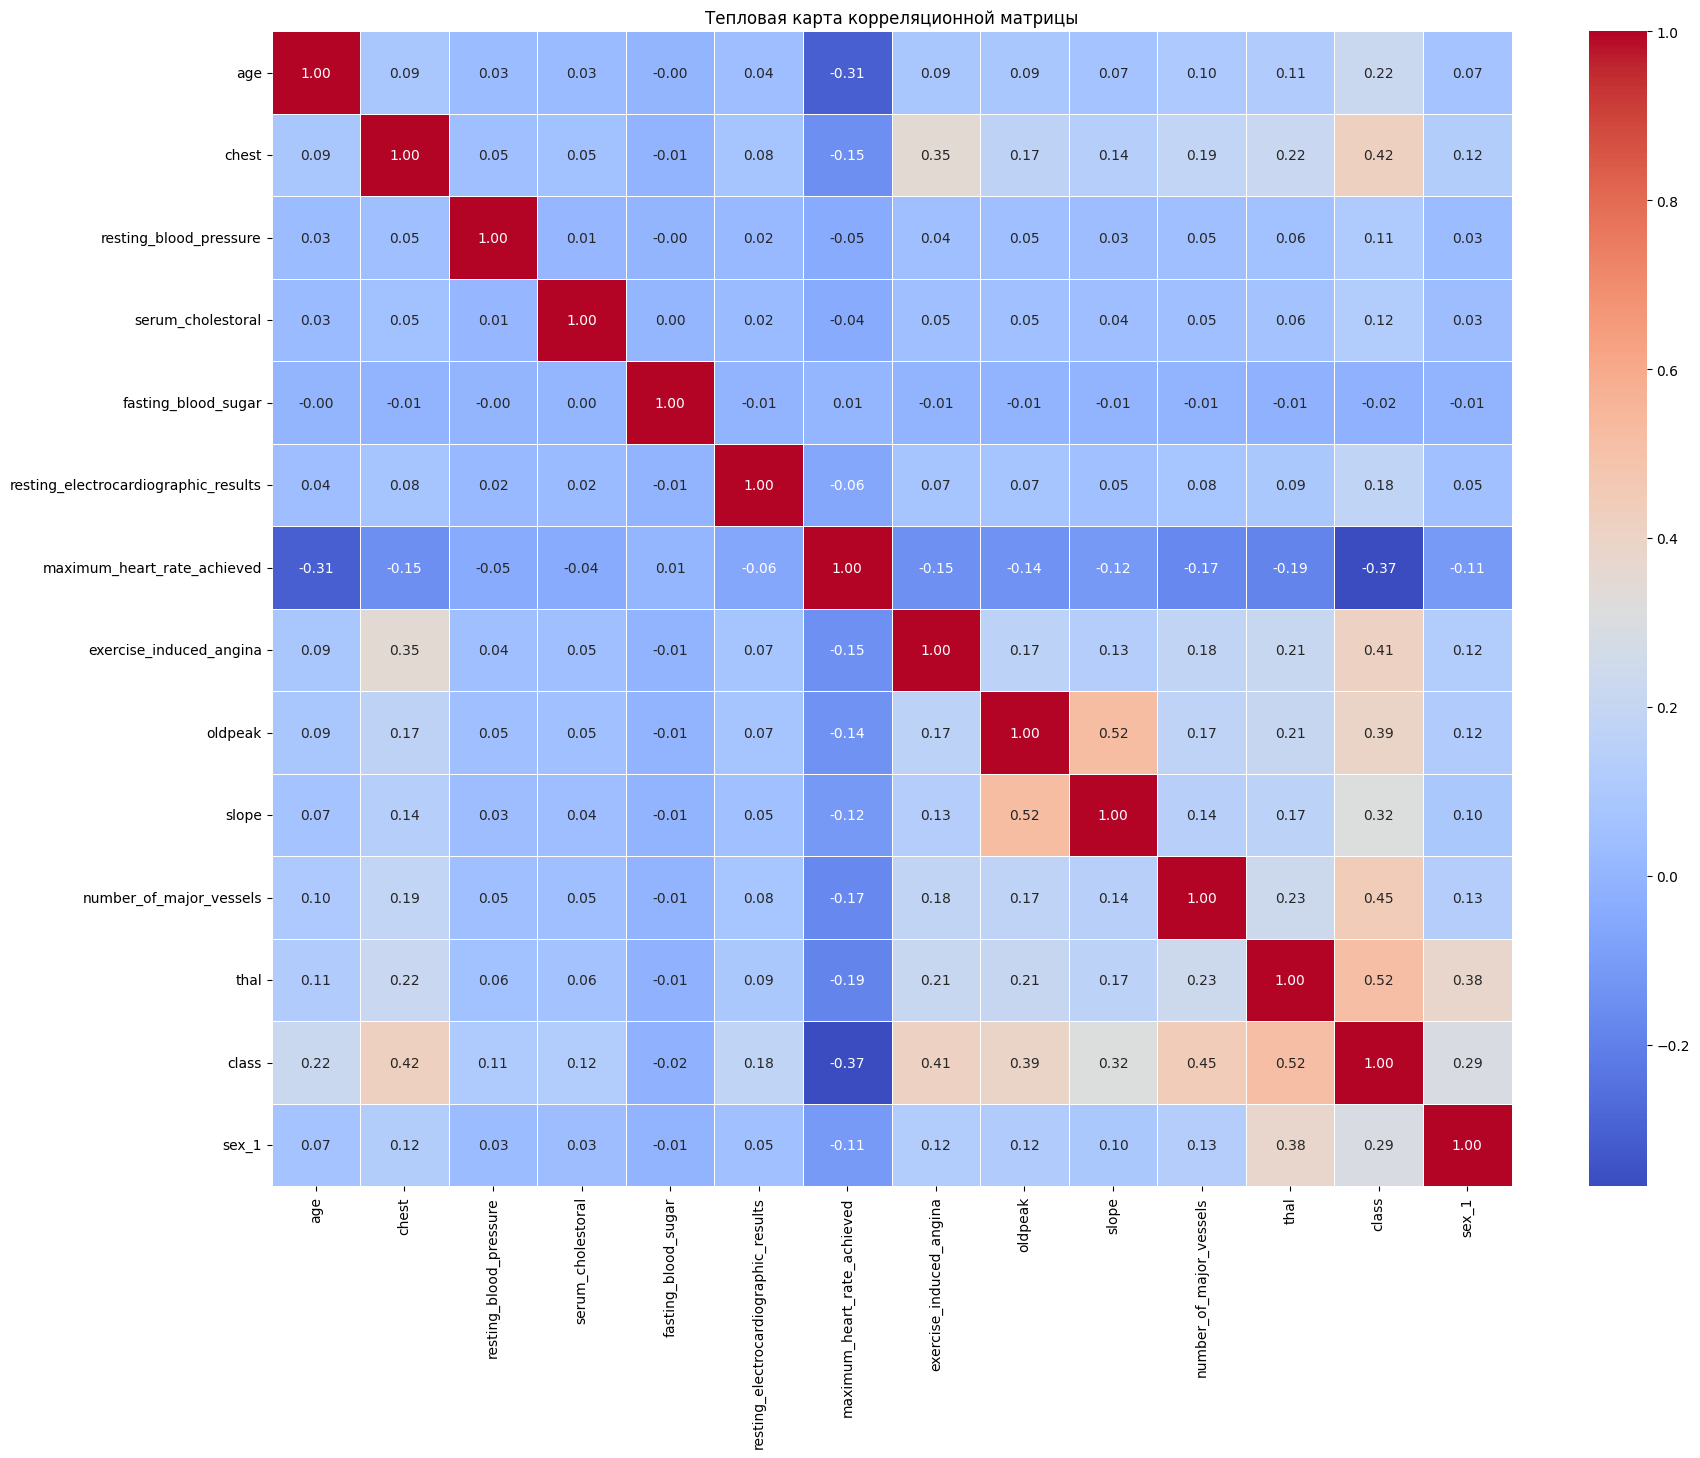

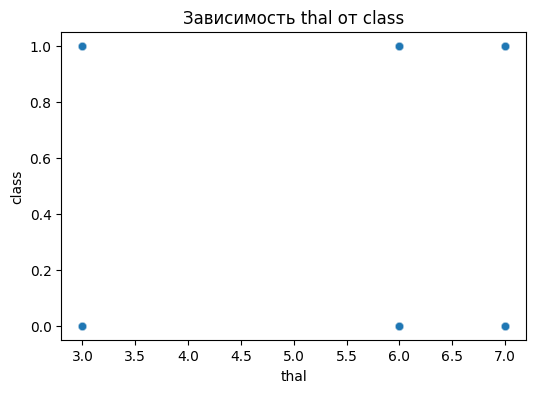

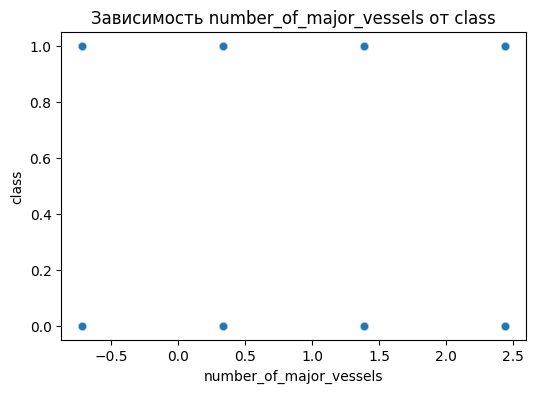

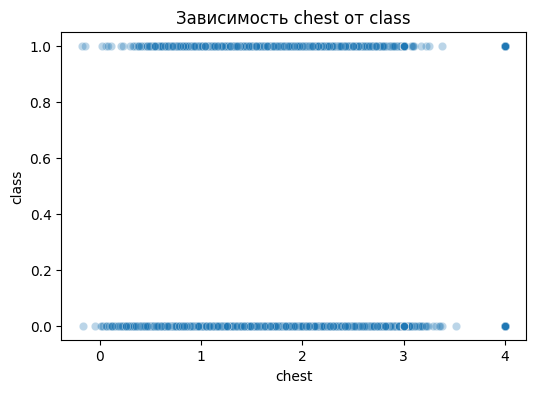

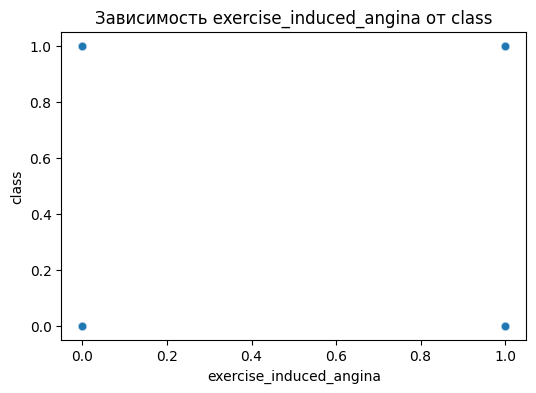

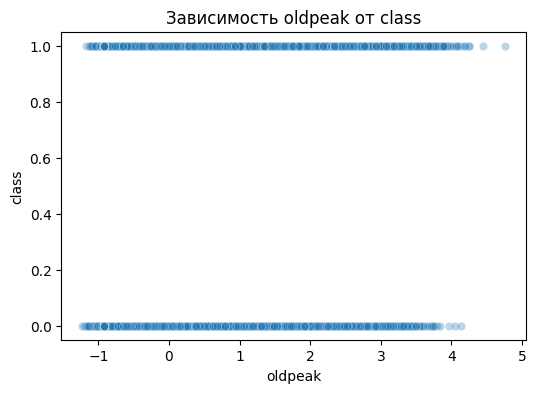

In [10]:
# Выборка только обучающих данных для анализа
sample_data = data[data['is_train'] == 1].sample(
    n=min(100000, data[data['is_train'] == 1].shape[0]),
    random_state=42
)

# Корреляционная матрица, не удаляя столбец 'class'
corr_matrix = sample_data.drop(['is_train', 'ID'], axis=1).corr()

# Тепловая карта корреляционной матрицы
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляционной матрицы')
plt.show()

# Выбор топ 5 признаков по корреляции с целевой переменной 'class'
top_corr_features = corr_matrix['class'].abs().sort_values(ascending=False).index[1:6]

# Диаграммы рассеяния для наиболее коррелированных признаков
for feature in top_corr_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=sample_data[feature], y=sample_data['class'], alpha=0.3)
    plt.title(f'Зависимость {feature} от class')
    plt.xlabel(feature)
    plt.ylabel('class')
    plt.show()


4.2 Оценка выбросов
Используем ящик с усами (boxplot) для числовых признаков.

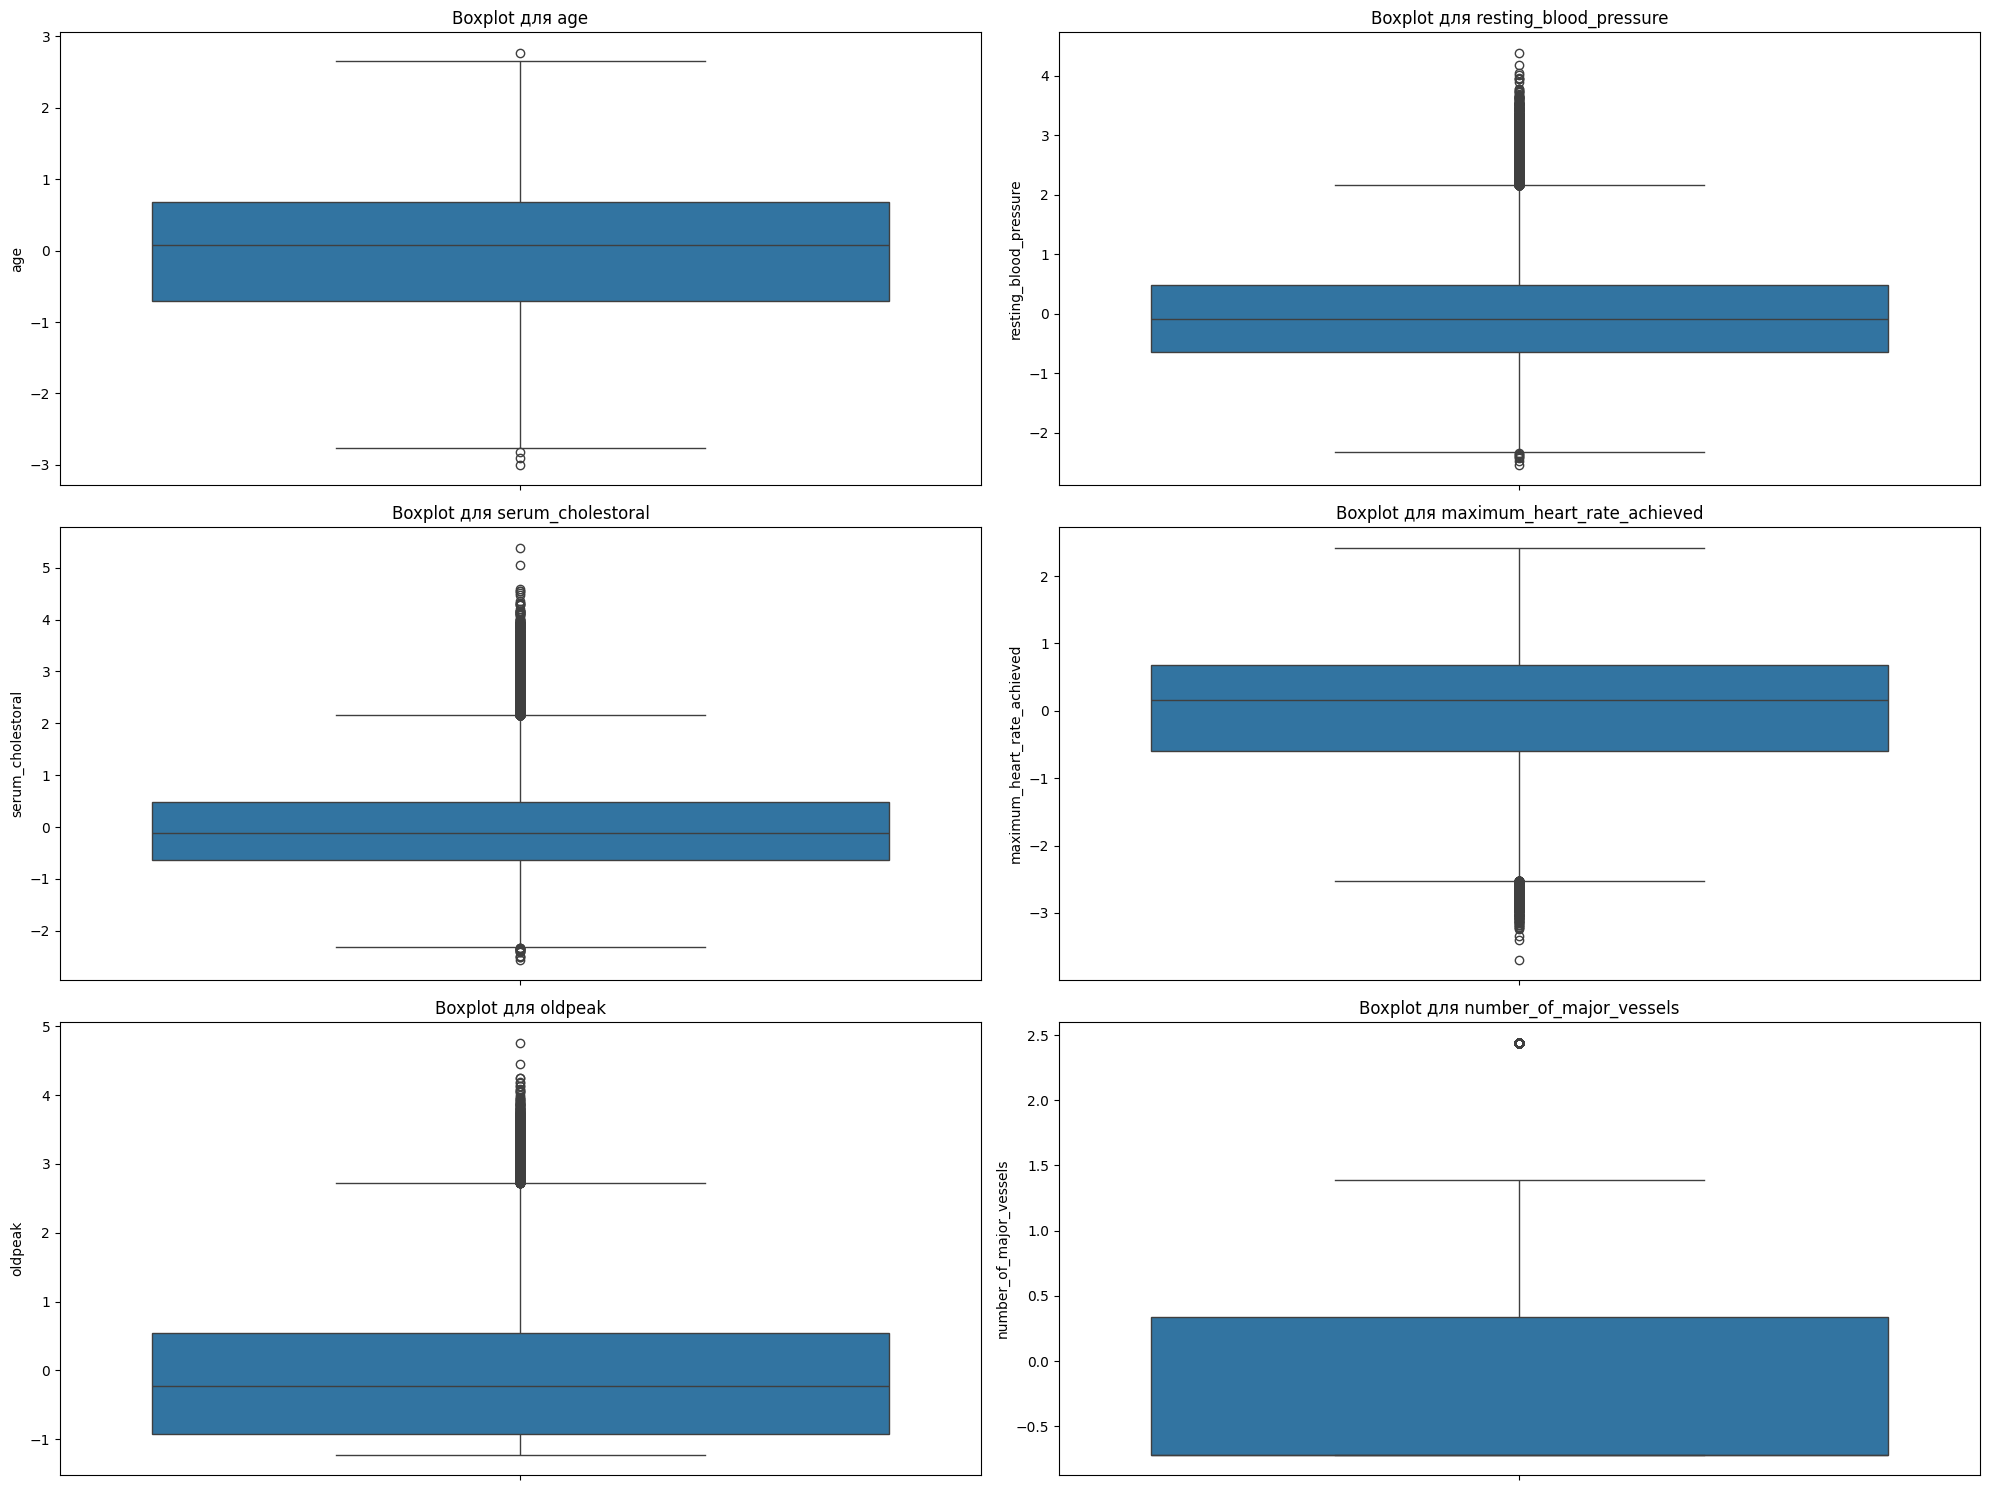

In [11]:
# Выбор числовых признаков для анализа выбросов
features_to_plot = numerical_features

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=sample_data[feature])
    plt.title(f'Boxplot для {feature}')
plt.tight_layout()
plt.show()


5. Разделение данных на обучающую и тестовую выборки

Разделим обработанные данные обратно на обучающий и тестовый наборы, а затем на обучающую и валидационную выборки.

In [12]:
# Разделение обратно на обучающий и тестовый наборы
train_processed = data[data['is_train'] == 1].drop(['is_train', 'ID'], axis=1)
test_processed = data[data['is_train'] == 0].drop(['is_train', 'ID', 'class'], axis=1)

# Целевая переменная
X = train_processed.drop('class', axis=1)
y = train_processed['class'].astype(int)

# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Размеры выборок: \nX_train: {X_train.shape}, X_val: {X_val.shape}, y_train: {y_train.shape}, y_val: {y_val.shape}")


Размеры выборок: 
X_train: (480000, 13), X_val: (120000, 13), y_train: (480000,), y_val: (120000,)


6. Обучение моделей

6.1 Логистическая регрессия

In [13]:
# Логистическая регрессия
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
y_proba_lr = lr.predict_proba(X_val)[:,1]

# Оценка модели
print("Логистическая регрессия:")
print(classification_report(y_val, y_pred_lr))
print(f"AUC: {roc_auc_score(y_val, y_proba_lr):.4f}")


Логистическая регрессия:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     66698
           1       0.87      0.85      0.86     53302

    accuracy                           0.88    120000
   macro avg       0.88      0.88      0.88    120000
weighted avg       0.88      0.88      0.88    120000

AUC: 0.9483


6.2 Случайный лес

In [14]:
# Случайный лес
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
y_proba_rf = rf.predict_proba(X_val)[:,1]

# Оценка модели
print("Случайный лес:")
print(classification_report(y_val, y_pred_rf))
print(f"AUC: {roc_auc_score(y_val, y_proba_rf):.4f}")


Случайный лес:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     66698
           1       0.89      0.87      0.88     53302

    accuracy                           0.90    120000
   macro avg       0.90      0.90      0.90    120000
weighted avg       0.90      0.90      0.90    120000

AUC: 0.9602


6.3 XGBoost

In [15]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
y_proba_xgb = xgb.predict_proba(X_val)[:,1]

# Оценка модели
print("XGBoost:")
print(classification_report(y_val, y_pred_xgb))
print(f"AUC: {roc_auc_score(y_val, y_proba_xgb):.4f}")


XGBoost:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     66698
           1       0.90      0.88      0.89     53302

    accuracy                           0.90    120000
   macro avg       0.90      0.90      0.90    120000
weighted avg       0.90      0.90      0.90    120000

AUC: 0.9648


6.4 Глубокая нейронная сеть

Обучим модель глубокой нейронной сети и оценим её качество. Также построим графики обучения.

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - auc: 0.9262 - loss: 0.3409 - val_auc: 0.9576 - val_loss: 0.2612
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.9549 - loss: 0.2694 - val_auc: 0.9588 - val_loss: 0.2574
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - auc: 0.9564 - loss: 0.2644 - val_auc: 0.9595 - val_loss: 0.2560
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc: 0.9574 - loss: 0.2615 - val_auc: 0.9599 - val_loss: 0.2552
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.9577 - loss: 0.2606 - val_auc: 0.9602 - val_loss: 0.2545
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.9586 - loss: 0.2576 - val_auc: 0.9604 - val_loss: 0.2530
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.9589 - loss: 0.2571 - val_auc: 0.9609 - val_loss: 0.2528
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.9593 - loss: 0.2557 - val_auc: 0.9611 - val_loss: 0.2521
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - au

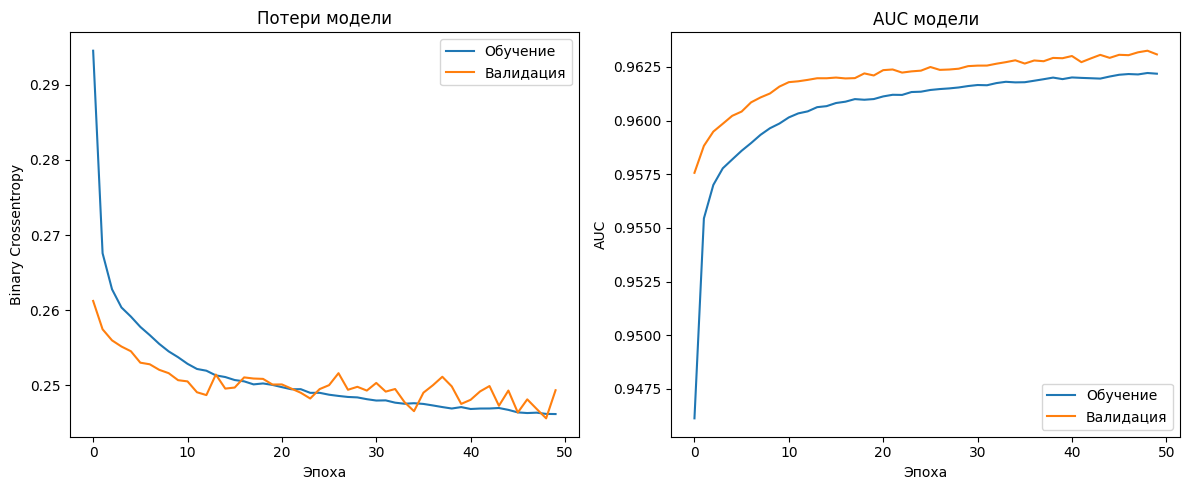

In [17]:
# Стандартизация данных для нейронной сети
scaler_nn = StandardScaler()
X_train_scaled = scaler_nn.fit_transform(X_train)
X_val_scaled = scaler_nn.transform(X_val)
test_scaled = scaler_nn.transform(test_processed)

# Построение модели
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компиляция модели с явным заданием имени метрики
from tensorflow.keras.metrics import AUC

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[AUC(name='auc')]
)

# Обучение модели с ранней остановкой
early_stop = EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=1024,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stop],
    verbose=1
)

# Проверка доступных метрик
print(history.history.keys())

# Оценка модели
y_proba_nn = model.predict(X_val_scaled).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

print("Глубокая нейронная сеть:")
print(classification_report(y_val, y_pred_nn))
print(f"AUC: {roc_auc_score(y_val, y_proba_nn):.4f}")

# Графики обучения
plt.figure(figsize=(12,5))

# Потери
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Binary Crossentropy')
plt.legend()

# AUC
plt.subplot(1,2,2)
plt.plot(history.history['auc'], label='Обучение')
plt.plot(history.history['val_auc'], label='Валидация')
plt.title('AUC модели')
plt.xlabel('Эпоха')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

7. Сравнение моделей

Сравним AUC разных моделей.

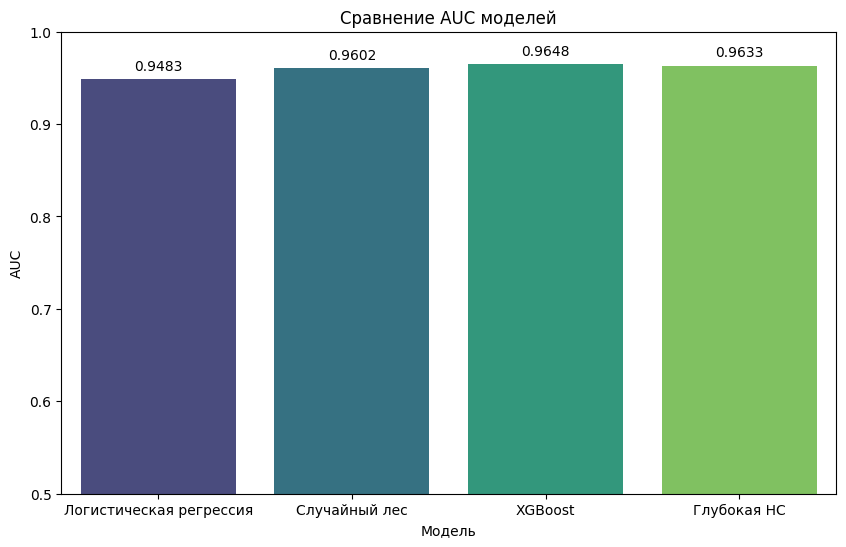

In [18]:
# Вычисление AUC для каждой модели
auc_lr = roc_auc_score(y_val, y_proba_lr)
auc_rf = roc_auc_score(y_val, y_proba_rf)
auc_xgb = roc_auc_score(y_val, y_proba_xgb)
auc_nn = roc_auc_score(y_val, y_proba_nn)

# Визуализация
models = ['Логистическая регрессия', 'Случайный лес', 'XGBoost', 'Глубокая НС']
auc_scores = [auc_lr, auc_rf, auc_xgb, auc_nn]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=auc_scores, palette='viridis')
plt.ylim(0.5, 1)
plt.title('Сравнение AUC моделей')
plt.ylabel('AUC')
plt.xlabel('Модель')
for index, value in enumerate(auc_scores):
    plt.text(index, value + 0.01, f"{value:.4f}", ha='center')
plt.show()


In [20]:
import joblib

In [21]:
import joblib

# Сохранение модели XGBoost
joblib.dump(xgb, 'models/xgboost_model.joblib')

# Сохранение масштабатора и энкодера
joblib.dump(scaler, 'models/scaler.joblib')
joblib.dump(encoder, 'models/encoder.joblib')

print("Модель XGBoost и объекты предобработки сохранены в папке 'models/'.")


Модели и масштабаторы сохранены.


8. Инференс: Предсказание на тестовом наборе

Скрипт для инференса, который можно использовать отдельно.

In [22]:
# Выбор лучшей модели по AUC (пример: XGBoost)
best_model = xgb
best_scaler = scaler  # Используем scaler, примененный ко всем моделям

# Обучение лучшей модели на всех обучающих данных
best_model.fit(X, y)

# Предсказания на тестовом наборе
test_predictions_proba = best_model.predict_proba(test_processed)[:,1]
test_predictions = best_model.predict(test_processed)

# Создание DataFrame для сохранения результатов
submission = pd.DataFrame({
    'ID': test_ids,
    'class': test_predictions
})

# Сохранение результатов
submission.to_csv('submission.csv', index=False)
print("Инференс завершен. Результаты сохранены в 'submission.csv'.")


Инференс завершен. Результаты сохранены в 'submission.csv'.


Отдельный скрипт

In [29]:
# scripts/inference.py

import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

def load_data(test_path):
    """
    Загрузка тестовых данных.
    """
    test = pd.read_csv(test_path)
    return test

def preprocess_data(data, scaler, encoder):
    """
    Предобработка данных:
    - Заполнение пропущенных значений медианой для числовых признаков
    - One-Hot Encoding для категориальных признаков
    - Масштабирование числовых признаков
    - Удаление ненужных признаков (например, 'ID')
    """
    # Сохранение 'ID' для финального файла
    test_ids = data['ID']

    # Удаление 'ID' из данных перед предобработкой
    data = data.drop(['ID'], axis=1)

    # Определение числовых и категориальных признаков
    numerical_features = ['age', 'resting_blood_pressure', 'serum_cholestoral',
                          'maximum_heart_rate_achieved', 'oldpeak', 'number_of_major_vessels']
    categorical_features = ['sex']

    # Заполнение пропущенных значений медианой для числовых признаков
    for feature in numerical_features:
        if data[feature].isnull().sum() > 0:
            median = data[feature].median()
            data[feature].fillna(median, inplace=True)

    # One-Hot Encoding для категориальных признаков
    encoded_categorical = encoder.transform(data[categorical_features])
    encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

    # Объединение закодированных категориальных признаков с исходными данными
    data = pd.concat([data.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

    # Удаление исходных категориальных признаков
    data.drop(categorical_features, axis=1, inplace=True)

    # Масштабирование числовых признаков
    data[numerical_features] = scaler.transform(data[numerical_features])

    return data, test_ids

def predict(model, data):
    """
    Выполнение предсказаний с использованием модели XGBoost.
    """
    predictions = model.predict(data)
    probabilities = model.predict_proba(data)[:,1]
    return predictions, probabilities

def main():
    # Пути к файлам
    test_path = 'test.csv'  # Убедитесь, что путь корректен
    output_path = 'inference_submission.csv'

    # Загрузка тестовых данных
    test = load_data(test_path)

    # Проверка наличия столбца 'ID'
    if 'ID' not in test.columns:
        raise ValueError("В тестовых данных отсутствует столбец 'ID'.")

    # Загрузка масштабатора и энкодера
    scaler = joblib.load('scaler.joblib')
    encoder = joblib.load('encoder.joblib')

    # Предобработка данных
    test_processed, test_ids = preprocess_data(test, scaler, encoder)

    # Загрузка модели XGBoost
    model = joblib.load('xgboost_model.joblib')

    # Выполнение предсказаний
    predictions, probabilities = predict(model, test_processed)

    # Создание DataFrame для сохранения результатов
    submission = pd.DataFrame({
        'ID': test_ids,
        'class': predictions
    })

    # Сохранение результатов
    submission.to_csv(output_path, index=False)
    print(f"Инференс завершён. Результаты сохранены в '{output_path}'.")

if __name__ == "__main__":
    main()


Инференс завершён. Результаты сохранены в 'inference_submission.csv'.
